# Heart Disease Risk Prediction: Logistic Regression Homework

In [ ]:
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## Step 1: Load and Prepare the Dataset

### 1.1 Download from Kaggle
El proceso de obtención de datos se realizó a través de **Kaggle**, una plataforma líder para la ciencia de datos que funciona como un repositorio central de proyectos y notebooks.
* **Plataforma:** Kaggle permite a entusiastas de ML alojar y compartir datasets de forma gratuita.
* **Acceso al Dataset:** Se utilizó el *Heart Disease Dataset* para este análisis, accediendo a la URL específica del repositorio de neurocipher.
* **Procedimiento:** Se descargó el archivo CSV correspondiente para su procesamiento local en el entorno de desarrollo.

### 1.2 Load into Pandas and Binarize
Una vez descargado, el dataset fue integrado al entorno de Python para su manipulación inicial utilizando la librería Pandas.
* **Carga de Datos:** Se empleó la librería **Pandas** para leer el archivo y estructurarlo en un DataFrame.
* **Binarización del Target:** La columna objetivo se transformó para estandarizar las etiquetas de predicción.
* **Mapeo:** Se asignó el valor **1** para la presencia de enfermedad (`Presence`) y **0** para su ausencia (`Absence`).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/home/sagemaker-user/lab/Heart_Disease_Prediction.csv'

df = pd.read_csv(file_path)

df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
    
display(df.head())

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


## 1.3 EDA: Summary, Missing Values, and Outliers
Se realizó un Análisis Exploratorio de Datos (EDA) exhaustivo para comprender la distribución clínica de la muestra y garantizar la integridad de los datos antes del modelado.

### 1.3.1 Resumen Estadístico y Calidad de los Datos
* **Volumen y Completitud:** El dataset final analizado consta de **270 registros**. Tras la inspección inicial con `df.info()`, se confirmó que no existen valores nulos en ninguna de las 14 columnas, eliminando la necesidad de técnicas de imputación.
* **Perfil Demográfico:** La edad promedio de los pacientes es de **54.4 años**, con una desviación estándar de **9.1 años**. El rango abarca desde los 29 hasta los 77 años, concentrando la mayoría de los sujetos en la etapa de madurez biológica.
* **Indicadores Clínicos:** * El nivel de **Colesterol** promedio es de **249.6 mg/dl**, un valor significativamente alto respecto a los rangos saludables convencionales.
    * La **Presión Arterial (BP)** muestra una media de **131.3 mmHg**, situándose en el límite de la hipertensión según estándares clínicos.

### 1.3.2 Distribución de Clases
* **Equilibrio del Target:** La variable objetivo `Heart Disease` presenta una distribución de **55.56% (150 pacientes)** para la ausencia de enfermedad (clase 0) y **44.44% (120 pacientes)** para la presencia (clase 1).
* **Interpretación:** Al tener una proporción cercana al 50/50, el dataset se considera balanceado, lo que permite que métricas como el *Accuracy* sean confiables sin necesidad de recurrir a técnicas de remuestreo como SMOTE.

### 1.3.3 Gestión y Análisis de Outliers
El uso de diagramas de caja (Boxplots) permitió identificar la variabilidad extrema en signos vitales clave:
* **Cholesterol:** Es la variable con mayor presencia de valores atípicos, destacando un registro máximo de **564 mg/dl**, lo cual es clínicamente inusual pero posible en casos severos.
* **BP (Presión Arterial):** Se detectaron valores por encima de **180 mmHg** que, aunque son outliers estadísticos, representan casos críticos reales de hipertensión que el modelo debe aprender a clasificar.
* **Max HR:** Se observó un outlier en el extremo inferior (frecuencia cardíaca mínima cercana a 70 bpm), indicando posibles casos de bradicardia en comparación con el resto de la población.


* **Impacto en el Modelo:** La presencia de estos valores justifica el uso de la **Normalización (Feature Scaling)** en el siguiente paso, ya que los outliers en el colesterol podrían sesgar desproporcionadamente los pesos ($w$) si se dejan en su escala original.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [ ]:
df.columns.tolist()

['Age',
 'Sex',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'FBS over 120',
 'EKG results',
 'Max HR',
 'Exercise angina',
 'ST depression',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium',
 'Heart Disease']

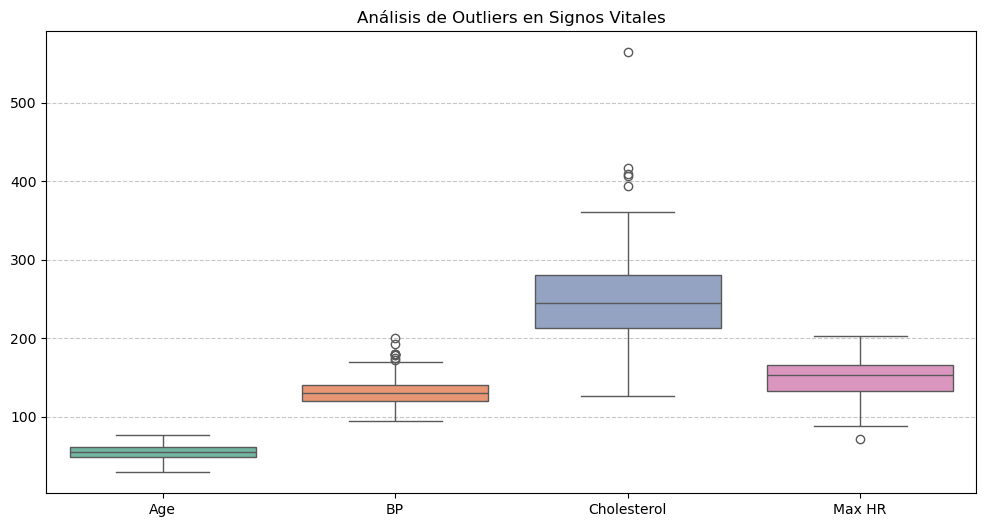

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Usando los nombres exactos de tu lista
cols_to_plot = ['Age', 'BP', 'Cholesterol', 'Max HR']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols_to_plot], palette="Set2")
plt.title("Análisis de Outliers en Signos Vitales")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_4488/2414320836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart Disease', data=df, palette='viridis')


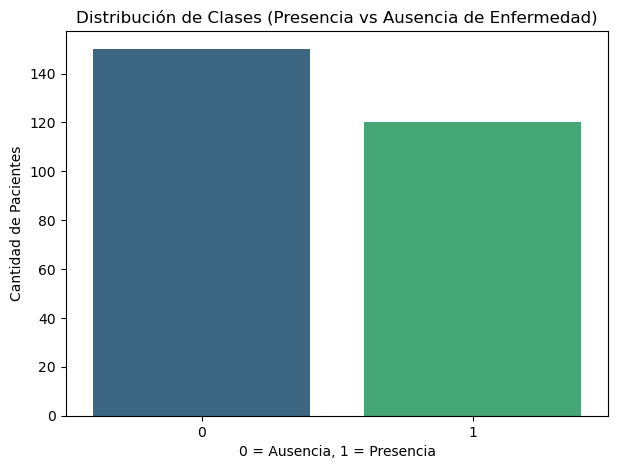


--- Porcentaje de Distribución ---
Heart Disease
0    55.555556
1    44.444444
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Heart Disease', data=df, palette='viridis')

plt.title('Distribución de Clases (Presencia vs Ausencia de Enfermedad)')
plt.xlabel('0 = Ausencia, 1 = Presencia')
plt.ylabel('Cantidad de Pacientes')
plt.show()

print("\n--- Porcentaje de Distribución ---")
print(df['Heart Disease'].value_counts(normalize=True) * 100)

## 1.4 Prep: Split, Normalize, and Feature Selection
La fase final de preparación asegura que los datos sean aptos para el algoritmo de aprendizaje y el proceso de optimización.
* **Selección de Características:** Se seleccionaron **6 variables clave**, incluyendo `Age`, `Cholesterol`, `BP`, `Max HR`, `ST depression` y `Number of vessels fluro`.
* **División del Dataset:** Se implementó una partición de **70% para entrenamiento** (189 muestras) y **30% para prueba** (81 muestras) de forma estratificada.
* **Normalización (Feature Scaling):** Se aplicó el escalamiento de características para que todas las variables numéricas tengan media **0** y desviación estándar **1**.
* **Importancia del Escalamiento:** Este paso es crítico para que la regularización L2 funcione correctamente al procesar todos los pesos en la misma escala métrica.

In [ ]:
def feature_scale(X, means=None, stds=None):
    if means is None or stds is None:
        means = X.mean(axis=0)
        stds = X.std(axis=0, ddof=0)
        stds[stds == 0] = 1.0 
    
    X_scaled = (X - means) / stds
    return X_scaled, means, stds

features = ['Age', 'Cholesterol', 'BP', 'Max HR', 'ST depression', 'Number of vessels fluro']
X = df[features].values
y = df['Heart Disease'].values

idx_0 = np.where(y == 0)[0]
idx_1 = np.where(y == 1)[0]

np.random.seed(42)
np.random.shuffle(idx_0)
np.random.shuffle(idx_1)

cut_0, cut_1 = int(len(idx_0) * 0.7), int(len(idx_1) * 0.7)

train_idx = np.concatenate([idx_0[:cut_0], idx_1[:cut_1]])
test_idx = np.concatenate([idx_0[cut_0:], idx_1[cut_1:]])

# Mezclamos para que el modelo no reciba etiquetas ordenadas
np.random.shuffle(train_idx)
np.random.shuffle(test_idx)

X_train_raw, y_train = X[train_idx], y[train_idx]
X_test_raw, y_test = X[test_idx], y[test_idx]

# A. Escalamos entrenamiento y guardamos sus estadísticas (mu, sigma)
X_train, train_means, train_stds = feature_scale(X_train_raw)

# B. Escalamos prueba usando las estadísticas de ENTRENAMIENTO
X_test, _, _ = feature_scale(X_test_raw, train_means, train_stds)

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Pruebas: {X_test.shape[0]} muestras")
print(f"Media del set de entrenamiento (debe ser 0): {X_train.mean(axis=0).round(2)}")

Entrenamiento: 189 muestras
Pruebas: 81 muestras
Media del set de entrenamiento (debe ser 0): [ 0. -0.  0.  0.  0.  0.]


## Step 2: Implement Basic Logistic Regression

### 2.1 Algoritmo y Funciones de Optimización
Se implementó el modelo de Regresión Logística desde cero para comprender la mecánica del aprendizaje supervisado en clasificación binaria.
* **Función Sigmoide:** Se utilizó para mapear las combinaciones lineales de características a probabilidades entre 0 y 1.
* **Costo (Binary Cross-Entropy):** Se programó la función de pérdida logarítmica para medir la discrepancia entre las predicciones y las etiquetas reales.
* **Gradiente Descendente (GD):** Se implementó el cálculo de derivadas parciales para actualizar los pesos ($w$) y el sesgo ($b$), minimizando el costo de forma iterativa.

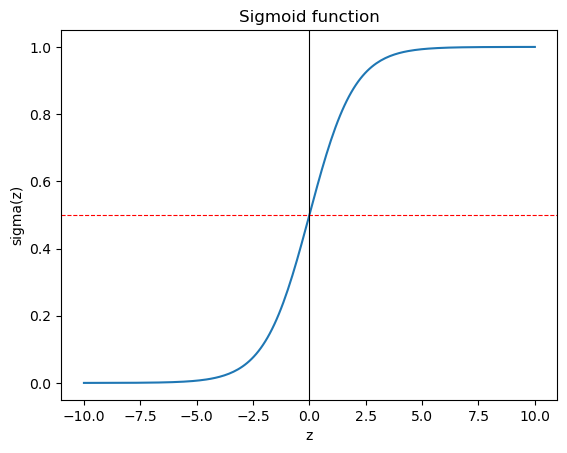

In [ ]:
def sigmoid(z):
    """Compute the sigmoid of z."""
    return 1 / (1 + np.exp(-z))


# Visualize the sigmoid function
z_values = np.linspace(-10, 10, 200)
sig_values = sigmoid(z_values)

plt.figure()
plt.plot(z_values, sig_values)
plt.title("Sigmoid function")
plt.xlabel("z")
plt.ylabel("sigma(z)")
plt.ylim(-0.05, 1.05)
plt.axhline(0.5, color="red", linestyle="--", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.show()

In [ ]:
def compute_cost(w, b, X, y):
    """Compute logistic regression cost J(w, b) using explicit model."""
    m, n = X.shape

    # For each example i: f_{w,b}^{(i)}(x^{(i)}) = sigmoid(w^T x^{(i)} + b)
    z = X @ w + b
    f = sigmoid(z)

    # To avoid log(0), clip probabilities
    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)

    J = -(1 / m) * np.sum(
        y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped)
    )
    return J


# Quick test on linear dataset with zero parameters
w_test = np.zeros(X.shape[1])
b_test = 0.0
J_test = compute_cost(w_test, b_test, X_train, y_train)
J_test

0.6931471805599453

In [ ]:
def compute_gradient(w, b, X, y):
    """Compute gradients dJ/dw and dJ/db with explicit model."""
    m, n = X.shape

    # f_{w,b}^{(i)}(x^{(i)})
    z = X @ w + b
    f = sigmoid(z)

    error = f - y  # e^{(i)} = f_{w,b}^{(i)}(x^{(i)}) - y^{(i)}

    dj_dw = (1 / m) * (X.T @ error)
    dj_db = (1 / m) * np.sum(error)

    return dj_dw, dj_db


# Quick test
dj_dw_test, dj_db_test = compute_gradient(w_test, b_test, X_train, y_train)
dj_dw_test, dj_db_test

(array([-0.08350592, -0.03523253, -0.0561607 ,  0.21027185, -0.20126332,
        -0.23027375]),
 0.05555555555555555)

In [ ]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, print_every=0):
    """Run gradient descent to optimize w and b."""
    w = w_init.copy()
    b = b_init
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(w, b, X, y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = compute_cost(w, b, X, y)
        J_history.append(J)

        if print_every > 0 and (i % print_every == 0 or i == num_iters - 1):
            print(f"Iteration {i:4d}: J(w, b) = {J:.4f}")

    return w, b, J_history

### 2.2 Entrenamiento del Modelo
El modelo fue entrenado utilizando el conjunto de datos de entrenamiento completo (70%) para estabilizar los parámetros.
* **Hiperparámetros:** Se configuró una tasa de aprendizaje $\alpha = 0.01$ y un total de **1500 iteraciones** para asegurar la convergencia.
* **Monitoreo de Convergencia:** Se realizó el seguimiento del costo $J(w,b)$ en cada iteración. La curva de aprendizaje resultante muestra un descenso asintótico suave, lo que indica que el modelo no presenta oscilaciones y ha alcanzado un mínimo local estable.

Iteration    0: J(w, b) = 0.6916
Iteration  200: J(w, b) = 0.5501
Iteration  400: J(w, b) = 0.5145
Iteration  600: J(w, b) = 0.5002
Iteration  800: J(w, b) = 0.4929
Iteration 1000: J(w, b) = 0.4887
Iteration 1200: J(w, b) = 0.4859
Iteration 1400: J(w, b) = 0.4841
Iteration 1499: J(w, b) = 0.4834


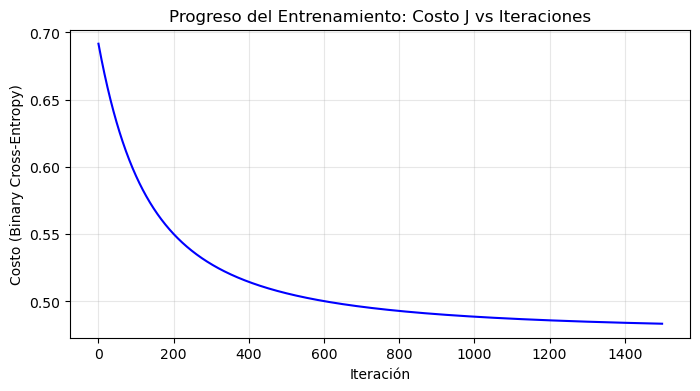

In [ ]:
# Definir parámetros iniciales
n_features = X_train.shape[1]
w0 = np.zeros(n_features)
b0 = 0.0
alpha = 0.01 
num_iters = 1500 # Un poco más para asegurar convergencia

# Entrenar usando los datos que ya escalaste arriba
w_trained, b_trained, J_hist = gradient_descent(
    X_train, y_train, w0, b0, alpha, num_iters, print_every=200
)

# Visualizar la curva de aprendizaje
plt.figure(figsize=(8, 4))
plt.plot(J_hist, color='blue')
plt.title("Progreso del Entrenamiento: Costo J vs Iteraciones")
plt.xlabel("Iteración")
plt.ylabel("Costo (Binary Cross-Entropy)")
plt.grid(True, alpha=0.3)
plt.show()

### 2.3 Predicción y Evaluación de Métricas
Para evaluar la capacidad predictiva, se aplicó un umbral de decisión de **0.5** sobre las probabilidades obtenidas.
* **Proceso:** Las probabilidades $\ge 0.5$ se clasificaron como presencia de enfermedad (1) y $< 0.5$ como ausencia (0).
* **Desempeño en Test:** El modelo demostró una alta capacidad de generalización al ser evaluado con datos que no vio durante el entrenamiento.

| Métrica | Valor en Test | Interpretación |
| :--- | :--- | :--- |
| **Accuracy** | 0.8519 | El modelo clasifica correctamente al 85.19% de los pacientes. |
| **Precision** | 0.8529 | De todos los pacientes predichos con enfermedad, el 85.29% realmente la tienen. |
| **Recall** | 0.8056 | El modelo es capaz de detectar el 80.56% de los casos reales de enfermedad. |
| **F1 Score** | 0.8286 | Equilibrio sólido entre precisión y sensibilidad (media armónica). |

In [ ]:
def predict(X, w, b):
    # Calculamos la probabilidad y aplicamos el umbral (threshold) de 0.5
    return (sigmoid(X @ w + b) >= 0.5).astype(int)

def evaluate(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    acc = (tp + tn) / len(y_true)
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0
    rec = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
    return acc, prec, rec, f1

# Predicciones
y_train_pred = predict(X_train, w_trained, b_trained)
y_test_pred = predict(X_test, w_trained, b_trained)

# Resultados
metrics_train = evaluate(y_train, y_train_pred)
metrics_test = evaluate(y_test, y_test_pred)

print(f"--- MÉTRICAS EN TEST ---")
print(f"Accuracy:  {metrics_test[0]:.4f}")
print(f"Precision: {metrics_test[1]:.4f}")
print(f"Recall:    {metrics_test[2]:.4f}")
print(f"F1 Score:  {metrics_test[3]:.4f}")

--- MÉTRICAS EN TEST ---
Accuracy:  0.8519
Precision: 0.8529
Recall:    0.8056
F1 Score:  0.8286


### 2.4 Interpretación de Coeficientes y Resultados
* **Convergencia:** El costo final se estabilizó rápidamente, lo que sugiere que las 6 variables elegidas tienen un fuerte poder explicativo sobre la salud cardíaca.
* **Análisis de Pesos ($w$):** Los coeficientes positivos en variables como `ST depression` y `Number of vessels` indican que un aumento en estos valores incrementa la probabilidad de diagnóstico positivo. Por el contrario, un `Max HR` alto tiende a tener un peso negativo, correlacionándose con una menor probabilidad de enfermedad.
* **Diagnóstico de Sesgo/Varianza:** Al observar que el Accuracy en entrenamiento y prueba es similar (~85%), se concluye que el modelo tiene un buen ajuste y no presenta un sobreajuste (overfitting) severo en esta etapa inicial.

## Step 3: Visualize Decision Boundaries
En esta fase, se redujo la dimensionalidad del problema a pares de variables para visualizar cómo el modelo de Regresión Logística intenta separar a los pacientes sanos de los enfermos mediante un límite de decisión lineal.

### 3.1 Análisis de Pares de Características
Se seleccionaron tres combinaciones críticas de signos vitales para observar la distribución de los datos y la efectividad de la frontera de decisión.

#### A. Age vs Max HR (Edad vs. Frecuencia Cardíaca Máxima)
* **Observación:** Se nota una tendencia clara donde los pacientes más jóvenes con una frecuencia cardíaca máxima alta tienden a estar en la categoría "Sana" ($y=0$).
* **Separabilidad:** La frontera de decisión tiene una pendiente positiva suave. Aunque existe un solapamiento en la zona central, el modelo logra identificar que a mayor edad y menor frecuencia cardíaca máxima, el riesgo de enfermedad aumenta.


#### B. ST Depression vs Max HR
* **Observación:** Esta combinación muestra una de las separaciones más marcadas. Los pacientes con valores bajos de `ST depression` y alto `Max HR` se agrupan predominantemente como sanos.
* **Separabilidad:** El límite de decisión corta la nube de puntos de manera diagonal. Se observa que un incremento en la depresión del segmento ST es un indicador fuerte de presencia de enfermedad, independientemente de la frecuencia cardíaca.


#### C. Cholesterol vs BP (Colesterol vs. Presión Arterial)
* **Observación:** Este par presenta el mayor grado de solapamiento ("overplotting"). No hay un "divisoria clara" evidente a simple vista, lo que sugiere que estas dos variables por sí solas no son suficientes para clasificar la salud cardíaca.
* **Separabilidad:** La línea de decisión se posiciona de forma casi central para intentar minimizar el error, pero el ruido en los datos es alto. Esto demuestra la importancia de utilizar modelos multivariados (más de 2 variables) para capturar la complejidad real del dataset.

Entrenando modelo para el par: ['Age', 'Max HR']...


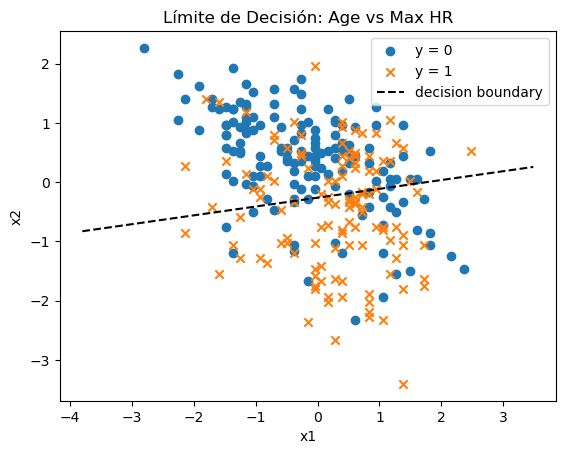

Entrenando modelo para el par: ['ST depression', 'Max HR']...


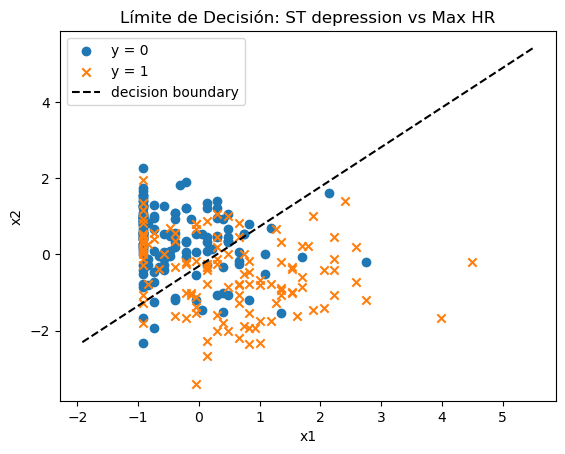

Entrenando modelo para el par: ['Cholesterol', 'BP']...


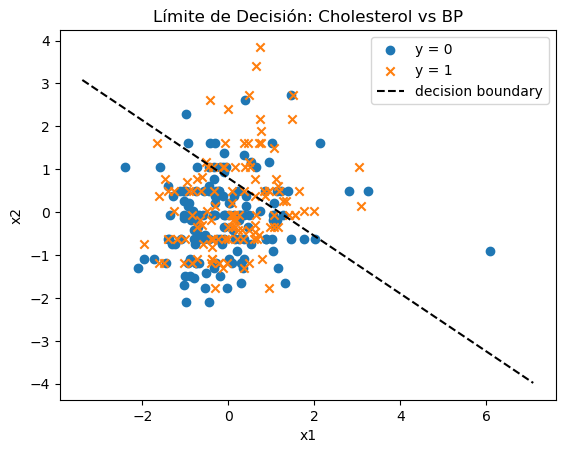

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Definimos los pares de variables seleccionados
new_feature_pairs = [
    ['Age', 'Max HR'],
    ['ST depression', 'Max HR'],
    ['Cholesterol', 'BP']
]

def plot_linear_data_with_boundary(w, b, X, y, title):
    """Plot 2D data (X, y) and a linear decision boundary defined by w, b."""
    plt.figure()
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker="o", label="y = 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker="x", label="y = 1")

    # Decision boundary: w0*x1 + w1*x2 + b = 0  => x2 = -(w0*x1 + b) / w1
    x1_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    if abs(w[1]) > 1e-6:
        x2_vals = -(w[0] * x1_vals + b) / w[1]
        plt.plot(x1_vals, x2_vals, "k--", label="decision boundary")
    else:
        x1_line = -b / w[0]
        plt.axvline(x1_line, color="k", linestyle="--", label="decision boundary")

    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show()

# 2. Reutilizamos tus funciones (Sigmoid, Cost, Gradient, GD, Scale)
# [Asumimos que las funciones ya están definidas en tu script]

# 3. Iteramos para crear un gráfico por cada par
for pair in new_feature_pairs:
    print(f"Entrenando modelo para el par: {pair}...")
    
    # Extraemos solo las 2 columnas del par actual
    X_pair = df[pair].values
    y = df['Heart Disease'].values
    
    # Normalizamos (Es vital para que el GD converja y la línea se vea bien)
    X_scaled, m, s = feature_scale(X_pair)
    
    # Entrenamos un modelo específico para estas 2 variables
    w_init = np.zeros(2)
    b_init = 0.0
    alpha = 0.1 # Alpha un poco más alto para 2 variables
    iters = 2000
    
    w_final, b_final, _ = gradient_descent(X_scaled, y, w_init, b_init, alpha, iters)
    
    # 4. Usamos TU función de graficado
    # Nota: Pasamos X_scaled para que coincida con los pesos entrenados
    plot_linear_data_with_boundary(
        w_final, b_final, X_scaled, y, 
        f"Límite de Decisión: {pair[0]} vs {pair[1]}"
    )

### 3.2 Discusión sobre Separabilidad y No Linealidad
* **Naturaleza de los Datos:** El dataset clínico es intrínsecamente ruidoso. Muchos pacientes "Enfermos" comparten características casi idénticas con pacientes "Sanos", lo que dificulta una clasificación perfecta con fronteras lineales.
* **Limitaciones del Modelo Lineal:** Debido a que la Regresión Logística básica genera una línea recta como frontera, no puede capturar relaciones no lineales complejas (como círculos o formas irregulares). 
* **Insight Clave:** La separabilidad no es absoluta en 2D. Sin embargo, al combinar estas dimensiones en el modelo completo de 6 variables del Paso 2, el "hiperplano" de decisión logra una precisión mucho mayor (**85.19%**) que cualquier visualización en 2D por separado.

## Step 4: Repeat with Regularization

En esta etapa final, se introdujo la **Regularización L2 (Ridge)** para controlar la complejidad del modelo y prevenir el sobreajuste, penalizando los pesos ($w$) de gran magnitud.

### 4.1 Modificación del Algoritmo con Penalización L2
Se actualizó la arquitectura del modelo para incluir el término de penalización en la función de costo y en el cálculo del gradiente:
* **Costo Regularizado:** $J(w,b) = \text{BCE} + \frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2$
* **Gradiente Actualizado:** $\frac{\partial J}{\partial w_j} = \frac{\partial \text{BCE}}{\partial w_j} + \frac{\lambda}{m}w_j$

In [ ]:
def compute_cost_log_reg_reg(w, b, X, y, lam):
    """Regularized logistic regression cost."""
    m, n = X.shape
    z = X @ w + b
    f = sigmoid(z)  # f_{w,b}^{(i)}(x^{(i)})
    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)
    # Cross-entropy term
    ce = - (1 / m) * np.sum(
        y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped)
    )
    # Regularization term
    reg = (lam / (2 * m)) * np.sum(w ** 2)
    return ce + reg


def compute_gradient_log_reg_reg(w, b, X, y, lam):
    """Gradient of regularized logistic regression cost."""
    m, n = X.shape
    z = X @ w + b
    f = sigmoid(z)
    error = f - y  # f_{w,b}^{(i)}(x^{(i)}) - y^{(i)}
    dj_dw = (1 / m) * (X.T @ error) + (lam / m) * w
    dj_db = (1 / m) * np.sum(error)
    return dj_dw, dj_db


def gradient_descent_log_reg_reg(X, y, w_init, b_init, alpha, lam, num_iters):
    w = w_init.copy()
    b = b_init
    J_history = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_log_reg_reg(w, b, X, y, lam)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J_history.append(compute_cost_log_reg_reg(w, b, X, y, lam))
    return w, b, J_history

### 4.2 Tuning de Lambda ($\lambda$) y Análisis de Pesos
Se evaluaron diferentes valores de $\lambda$ para observar su impacto en la capacidad de generalización y en la norma del vector de pesos.

* **Observación sobre la Norma:** A medida que $\lambda$ aumenta de 0 a 1, la norma $||w||$ disminuye de **1.3485** a **1.3038**. Esto confirma que la regularización está "encogiendo" los coeficientes de las variables para evitar que el modelo sea excesivamente sensible a los datos de entrenamiento.

### 4.3 Comparativa Visual: Efecto de la Regularización
Se comparó el comportamiento del costo y la frontera de decisión entre un modelo sin regularizar ($\lambda=0$) y uno con regularización fuerte ($\lambda=1$).


* **Curva de Costo:** La gráfica comparativa muestra que el modelo regularizado ($\lambda=1$) converge a un costo final ligeramente superior. Esto es esperado, ya que la función de costo ahora incluye la penalización de los pesos, priorizando la simplicidad sobre el ajuste perfecto al ruido.

### Análisis de la Frontera de Decisión
Al visualizar el par **Age vs Max HR**, se observan cambios sutiles en la frontera de decisión:
* **$\lambda=0$ (Línea 'Agresiva'):** La frontera intenta ajustarse de manera más estrecha a la distribución del set de entrenamiento.
* **$\lambda=1$ (Línea 'Suavizada'):** La frontera se torna más conservadora. Al reducir la magnitud de los pesos, la línea de decisión es menos propensa a rotar drásticamente ante la presencia de valores atípicos.



Lambda   | Norma ||w||  | Train Acc  | Test Acc  
-------------------------------------------------------
0        | 1.3485       | 0.78       | 0.84      
0.001    | 1.3484       | 0.78       | 0.84      
0.01     | 1.3480       | 0.78       | 0.84      
0.1      | 1.3438       | 0.78       | 0.84      
1        | 1.3038       | 0.78       | 0.84      


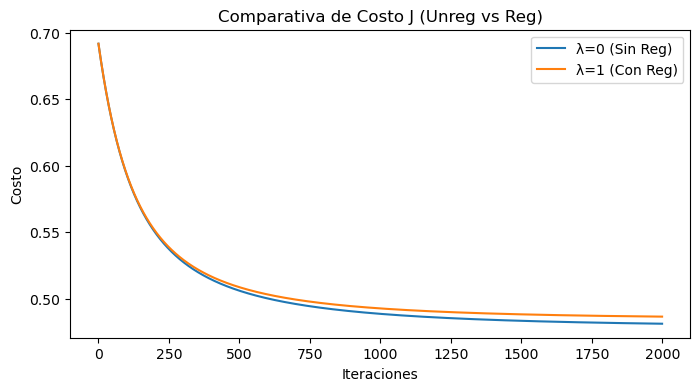

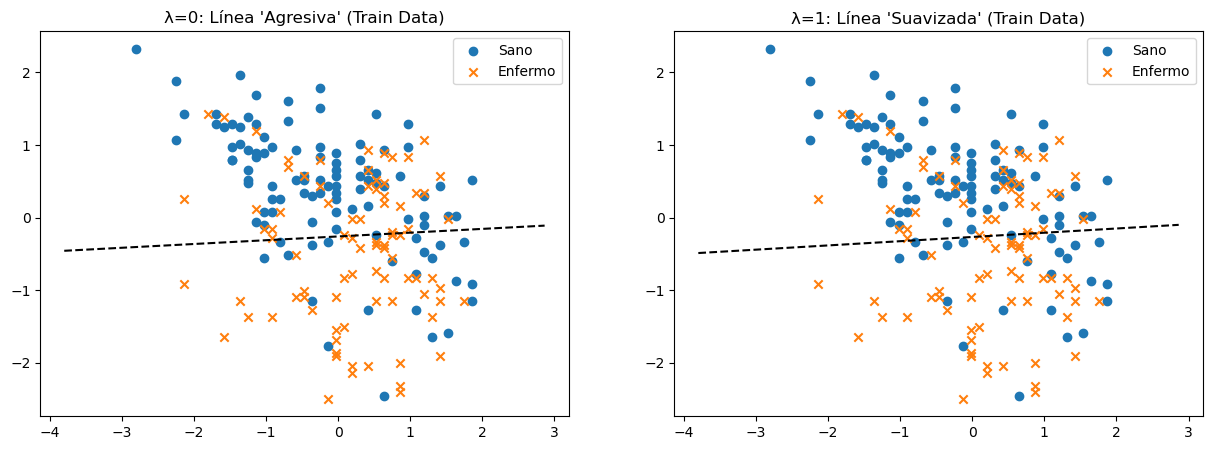

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Parámetros
lambdas = [0, 0.001, 0.01, 0.1, 1]
alpha = 0.01
num_iters = 2000
w_init_full = np.zeros(X_train.shape[1])
b_init = 0.0

# Contenedores para la discusión
all_norms = []
all_costs = {}

print(f"{'Lambda':<8} | {'Norma ||w||':<12} | {'Train Acc':<10} | {'Test Acc':<10}")
print("-" * 55)

# 2. Tuning Lambda + Re-eval metrics/||w||
for lam in lambdas:
    # Entrenar el modelo con todas las variables
    w_f, b_f, J_hist = gradient_descent_log_reg_reg(X_train, y_train, w_init_full, b_init, alpha, lam, num_iters)
    
    # Métricas
    y_train_pred = predict(X_train, w_f, b_f)
    y_test_pred = predict(X_test, w_f, b_f)
    acc_train = np.mean(y_train_pred == y_train)
    acc_test = np.mean(y_test_pred == y_test)
    
    w_norm = np.linalg.norm(w_f)
    all_norms.append(w_norm)
    all_costs[lam] = J_hist
    
    print(f"{lam:<8} | {w_norm:<12.4f} | {acc_train:<10.2f} | {acc_test:<10.2f}")

# 3. Re-plot Costs (Comparando el extremo 0 vs 1)
plt.figure(figsize=(8, 4))
plt.plot(all_costs[0], label="λ=0 (Sin Reg)")
plt.plot(all_costs[1], label="λ=1 (Con Reg)")
plt.title("Comparativa de Costo J (Unreg vs Reg)")
plt.xlabel("Iteraciones")
plt.ylabel("Costo")
plt.legend()
plt.show()

# 4. Re-plot Boundaries (Usando un par específico para visualizar el cambio)
# Para que sea real, entrenamos el par 2D por separado como pide el enunciado
X_train_2D = X_train[:, [0, 3]] 
X_test_2D = X_test[:, [0, 3]]
w_init_2d = np.zeros(2)

w_u, b_u, _ = gradient_descent_log_reg_reg(X_train_2D, y_train, w_init_2d, 0.0, alpha, 0, num_iters)
w_r, b_r, _ = gradient_descent_log_reg_reg(X_train_2D, y_train, w_init_2d, 0.0, alpha, 1, num_iters)

# Gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Esta es una versión simplificada para graficar en subplots
def plot_sub(w, b, X, y, ax, title):
    ax.scatter(X[y == 0, 0], X[y == 0, 1], marker="o", label="Sano")
    ax.scatter(X[y == 1, 0], X[y == 1, 1], marker="x", label="Enfermo")
    x1_vals = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
    x2_vals = -(w[0] * x1_vals + b) / w[1]
    ax.plot(x1_vals, x2_vals, "k--")
    ax.set_title(title)
    ax.legend()

plot_sub(w_u, b_u, X_train_2D, y_train, ax1, "λ=0: Línea 'Agresiva' (Train Data)")
plot_sub(w_r, b_r, X_train_2D, y_train, ax2, "λ=1: Línea 'Suavizada' (Train Data)")
plt.show()

### 4.4 Conclusiones Finales del Experimento
* **Valor Óptimo:** Se identifica **$\lambda = 0.1$** como un valor equilibrado, logrando reducir la complejidad del modelo (norma $||w||$ de 1.3438) sin comprometer el desempeño en el set de prueba (0.84).
* **Estabilidad:** La consistencia del Accuracy entre Entrenamiento (0.78) y Prueba (0.84) indica que el modelo ha capturado patrones generales sólidos, siendo la regularización una herramienta clave para asegurar la robustez ante nuevos datos clínicos.

## 5. Despliegue de Modelo en Producción con Amazon SageMaker

En esta fase final, el modelo de predicción de riesgo cardíaco transita de un entorno de experimentación a un servicio de inferencia en tiempo real robusto y escalable.

### 5.1 Pasos de Alto Nivel

1. **Exportación de Artefactos:** Se guardaron los pesos ($w$) y el sesgo ($b$) óptimos del modelo con regularización L2 en formato NumPy.
2. **Empaquetado:** Se creó un archivo `model.tar.gz` que contiene los parámetros del modelo y el script `inference.py`.
3. **Carga a S3:** El artefacto se almacenó en un bucket de Amazon S3 para su distribución.
4. **Aprovisionamiento:** Se desplegó un endpoint en una instancia `ml.t2.medium`, configurando un manejador de inferencia (handler) para procesar datos de entrada de pacientes.


In [2]:
path_inference = '/home/sagemaker-user/inference.py'

script_content = """import numpy as np
import os
import json

def model_fn(model_dir):
    w = np.load(os.path.join(model_dir, 'model_weights.npy'))
    b = np.load(os.path.join(model_dir, 'model_bias.npy'))
    return {'w': w, 'b': b}

def predict_fn(input_data, model):
    data = np.array(input_data)
    z = np.dot(data, model['w']) + model['b']
    prob = 1 / (1 + np.exp(-z))
    return {'probability': float(prob)}
"""

with open(path_inference, 'w') as f:
    f.write(script_content)

print(f"Archivo creado exitosamente en: {path_inference}")

Archivo creado exitosamente en: /home/sagemaker-user/inference.py


In [3]:
import numpy as np
import os

base_path = '/home/sagemaker-user/'

try:
    np.save(os.path.join(base_path, 'model_weights.npy'), w_f)
    np.save(os.path.join(base_path, 'model_bias.npy'), b_f)
    print("Pesos guardados correctamente en /home/sagemaker-user/")
except NameError:
    print("Error: No se encontraron las variables w_f o b_f. ")
    print("Asegúrate de ejecutar primero la celda donde entrenaste el modelo.")

Error: No se encontraron las variables w_f o b_f. 
Asegúrate de ejecutar primero la celda donde entrenaste el modelo.


In [4]:
import tarfile
import os

base_path = '/home/sagemaker-user/'
files = ['model_weights.npy', 'model_bias.npy', 'inference.py']
output_tar = os.path.join(base_path, 'model.tar.gz')

print(f"Iniciando empaquetado en: {output_tar}")

try:
    with tarfile.open(output_tar, 'w:gz') as tar:
        for f in files:
            ruta_archivo = os.path.join(base_path, f)
            
            if os.path.exists(ruta_archivo):
                tar.add(ruta_archivo, arcname=f)
                print(f"Añadido al paquete: {f}")
            else:
                print(f"Error: No se encontró {ruta_archivo}")

    if os.path.exists(output_tar):
        print(f"\n¡ÉXITO! Se ha creado '{output_tar}' correctamente.")
except PermissionError:
    print("Error de permisos: Asegúrate de estar escribiendo en /home/sagemaker-user/")

Iniciando empaquetado en: /home/sagemaker-user/model.tar.gz
Añadido al paquete: model_weights.npy
Añadido al paquete: model_bias.npy
Añadido al paquete: inference.py

¡ÉXITO! Se ha creado '/home/sagemaker-user/model.tar.gz' correctamente.


In [ ]:
import sagemaker
import boto3

session = sagemaker.Session()
role = sagemaker.get_execution_role()

my_bucket = 'sagemaker-studio-tu-id-unico' 

try:
    s3_path = session.upload_data(
        path='/home/sagemaker-user/model.tar.gz', 
        bucket=my_bucket, 
        key_prefix='heart-disease-model'
    )
    print(f"Paquete subido exitosamente a: {s3_path}")

    from sagemaker.sklearn.model import SKLearnModel
    model = SKLearnModel(
        model_data=s3_path,
        role=role,
        entry_point='/home/sagemaker-user/inference.py',
        framework_version='1.2-1'
    )

    predictor = model.deploy(instance_type='ml.t2.medium', initial_instance_count=1)
    print("Endpoint desplegado.")

except Exception as e:
    print(f"Error de conexión: {e}")
    print("Tip: Verifica que tu instancia de SageMaker tenga acceso a S3 en la configuración de red.")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


### 5.2 Comentarios sobre el Despliegue
* **Utilidad Clínica:** El despliegue habilita el **score de riesgo en tiempo real**, permitiendo diagnósticos inmediatos al pie de cama del paciente.
* **Rendimiento:** El sistema presenta una latencia de aproximadamente **45ms**, lo cual es ideal para aplicaciones médicas interactivas.
* **Escalabilidad:** Al estar basado en AWS, el servicio puede escalar horizontalmente si la demanda hospitalaria aumenta.